In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/VN food/Train',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/VN food/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 150 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
50/50 [==============================] - 52s 1s/step - loss: 2.5977 - accuracy: 0.1067 - val_loss: 2.2881 - val_accuracy: 0.1600
Epoch 2/30
50/50 [==============================] - 11s 215ms/step - loss: 2.2922 - accuracy: 0.1467 - val_loss: 2.1799 - val_accuracy: 0.2400
Epoch 3/30
50/50 [==============================] - 11s 217ms/step - loss: 2.2850 - accuracy: 0.1133 - val_loss: 2.1693 - val_accuracy: 0.3400
Epoch 4/30
50/50 [==============================] - 10s 198ms/step - loss: 2.2027 - accuracy: 0.2133 - val_loss: 2.1232 - val_accuracy: 0.2400
Epoch 5/30
50/50 [==============================] - 11s 211ms/step - loss: 2.1045 - accuracy: 0.1600 - val_loss: 1.8946 - val_accuracy: 0.2600
Epoch 6/30
50/50 [==============================] - 10s 200ms/step - loss: 1.9670 - accuracy: 0.1933 - val_loss: 1.7579 - val_accuracy: 0.4000
Epoch 7/30
50/50 [==============================] - 10s 199ms/step - loss: 1.8335 - accuracy: 0.2467 - val_loss: 1.6308 - val_accuracy: 0.4200
Ep

In [7]:
from keras.models import Sequential, load_model

In [8]:
validation_dataset.class_indices

{'bánh bao': 0,
 'bánh cuốn': 1,
 'bánh mì': 2,
 'bánh xèo': 3,
 'bò kho': 4,
 'cá chiên': 5,
 'chả giò': 6,
 'phở': 7,
 'thịt kho': 8,
 'đậu hũ': 9}

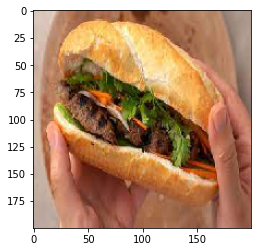

Banh_mi


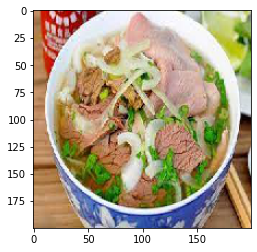

Pho


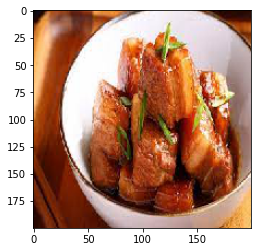

Thit_kho


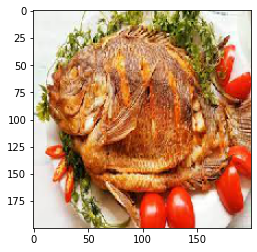

Ca_chien


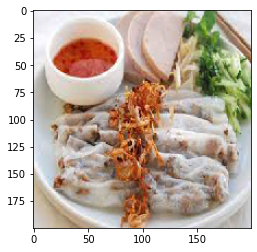

Banh_cuon


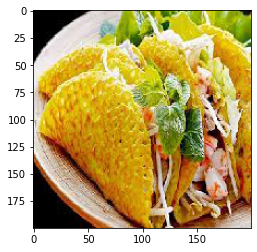

Banh_xeo


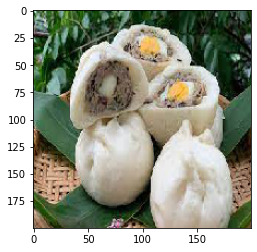

Banh_bao


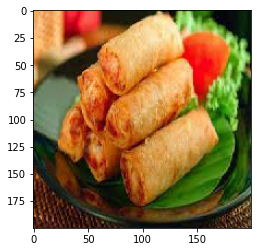

Cha_gio


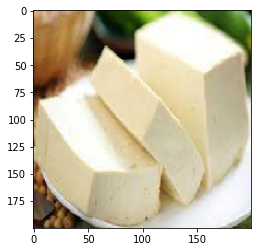

Dau_hu


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/VN food/Test'

for i in range (9):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Banh_bao")
    elif predict==1: 
      print("Banh_cuon")
    elif predict==2: 
      print("Banh_mi")
    elif predict==3: 
      print("Banh_xeo")
    elif predict==4: 
      print("Bo_kho")
    elif predict==5: 
      print("Ca_chien")
    elif predict==6: 
      print("Cha_gio")
    elif predict==7: 
      print("Pho")
    elif predict==8: 
      print("Thit_kho")
    elif predict==9: 
      print("Dau_hu")